# Practical session 2 - Practise with classic libraries

Students (pair):
- [Awhansou Yémalin]([link](https://github.com/username1))
- [Ouzanne Réda]([link](https://github.com/username2))

```
conda create --name=lab2 --file=requirement.txt
conda activate lab2
# do not forget to deactivate the environment if needed
# you can remove the environment once you are done
conda env remove --name=lab2
```

**Useful references for this lab**:

[1] `numpy`: [lecture notes (1.4.1-1.4.2)](https://scipy-lectures.org/intro/numpy/index.html) and [documentation](https://numpy.org/doc/stable/)

[2] `pandas`: [documentation](https://pandas.pydata.org/docs/getting_started/index.html), [quick tutorial](https://pandas.pydata.org/pandas-docs/version/0.15/10min.html)

[3] `matplotlib`: [lecture notes (1.5)](https://scipy-lectures.org/intro/matplotlib/index.html) and [documentation](https://matplotlib.org/)

[4] `h5py`: [quick start guide](http://docs.h5py.org/en/stable/quick.html#quick)

## <a name="content">Contents</a>
- [Exercise 1: Computing basic statistics](#ex1)
- [Exercise 2: Random variables and histograms](#ex2)
- [Exercise 3: Discrete isotropic total variation](#ex3)
---

In [18]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


---
## <a name="ex1">Exercise 1: Random variables and histograms</a>

In this exercise, we are interested in generating samples from the Gamma distribution $\mathcal{G}(\alpha,\beta)$, of probability density function (pdf)

\begin{equation}
    p(x) = \frac{\beta^\alpha}{\Gamma(\alpha)} x^{\alpha-1} \exp(-\beta x) \mathbb{1}_{\mathbb{R}_+^*}(x),
\end{equation}

and displaying their histogram. In the following, we consider $(\alpha, \beta) = (9, 2)$.

1\. Set the random seed to a fixed value for reproducibility, and biefly check your instruction works as intended.
> Hint: you may take a look at the following pages: [random module](https://numpy.org/doc/stable/reference/random/index.html?highlight=random#module-numpy.random), [random generator](https://numpy.org/doc/stable/reference/random/generator.html).

**Answer**:

In [110]:
import numpy as np
np.random.seed(123)
# On génère quelques nombres aléatoires pour vérifier (ce sont bien les mêmes lorsqu'on relance la cellule)
print(np.random.rand(5))

[0.69646919 0.28613933 0.22685145 0.55131477 0.71946897]


2\. Generate $\approx 10^5$ samples in a vector. Save the vector in a file, `samples.hdf5` or `samples.npy`.
> Warning / hint: 
> - take a careful look at the [documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.gamma.html?highlight=gamma#numpy.random.gamma) (multiple conventions exist for the definition of the pdf underlying the distribution...);
> - to save data in a `npy` file, take a look at the example reported in the [Numpy documentation](https://numpy.org/doc/stable/reference/generated/numpy.save.html);
> - to save data in a `.h5` file, take a quick look at the [documentation here](https://docs.h5py.org/en/stable/quick.html#quick).

**Answer**:

In [111]:
# Paramètres
alpha = 9
beta = 2
theta = 1 / beta  # scale = 1 / rate

# On génère 10^5 échantillons suivant la loi gamma
samples = np.random.gamma(shape=alpha, scale=theta, size=10**5)

# On sauvegarde les fichiers dans un fichier .npy
np.save("samples.npy", samples)

print("Taille du vecteur :", samples.shape)
print("Premier échantillon :", samples[0])


Taille du vecteur : (100000,)
Premier échantillon : 4.824962902800124


3\. Estimate an histogram of this distribution for a well chosen set of bins, and display it.
> Warnings: 
> - make sure the [histogram](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html?highlight=hist#matplotlib.pyplot.hist) corresponds to a probability density function (pdf);
> - do not forget to include a proper title with names for the axes.

**Answer**:

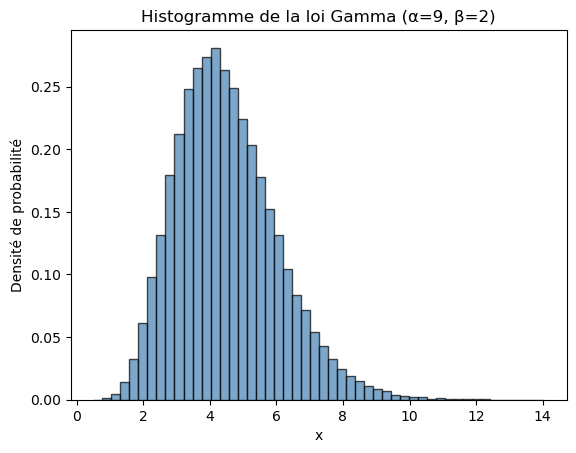

In [112]:
import matplotlib.pyplot as plt

# On crée l'histogramme normalisé (density=True pour avoir une densité de probabilité)
plt.hist(samples, bins=50, density=True, alpha=0.7, color='steelblue', edgecolor='black')

# Titres et labels
plt.title("Histogramme de la loi Gamma (α=9, β=2)")
plt.xlabel("x")
plt.ylabel("Densité de probabilité")

plt.show()

4\. Overlay the probability density function on the histogram and compare these in a few words. Save the resulting picture in `.png` format.
> Hint: 
> - take a look at the `scipy` [documentation](https://docs.scipy.org/doc/scipy/reference/stats.html) to avoid implementing the pdf from scratch;
> - return the bins in which the histogram is computed, and evaluate the pdf on those points.

**Answer**:

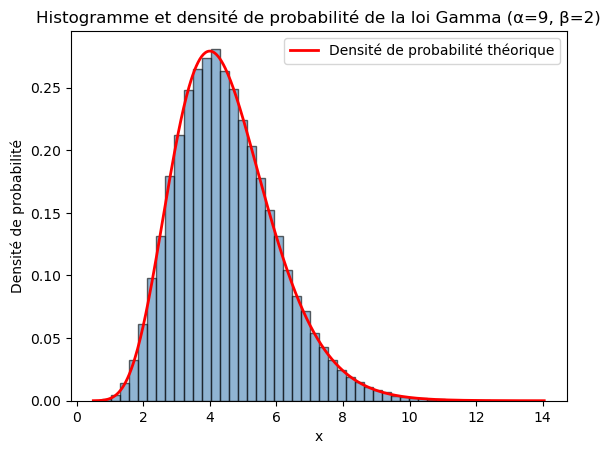

In [114]:
from scipy.stats import gamma

# Paramètres
alpha = 9
beta = 2
theta = 1 / beta  # scale = 1 / rate

# On retrace l'histogramme normalisé précédent
count, bins, _ = plt.hist(samples, bins=50, density=True,
                          alpha=0.6, color="steelblue", edgecolor="black")

# Points pour la densité théorique
x = np.linspace(min(bins), max(bins), 500)
pdf = gamma.pdf(x, a=alpha, scale=theta)

# Superposition de la densité théorique
plt.plot(x, pdf, 'r-', lw=2, label="Densité de probabilité théorique")

# Titres et axes
plt.title("Histogramme et densité de probabilité de la loi Gamma (α=9, β=2)")
plt.xlabel("x")
plt.ylabel("Densité de probabilité")
plt.legend()

# Sauvegarde en PNG
plt.savefig("histogramme_loi_gamma.png", dpi=300)
plt.show()


---
## <a name="ex2">Exercise 2: Basic statistics with `pandas`</a>

In this second exercise, we focus on computing basic statistics, and applying linear regression to a small data set. These data are gathered in the following table, which gives the infant mortality (`X`) and the gross national product per inhabitant (`Y`) of 12 european countries :

| `X` | 190 | 128 | 180 | 212 | 56 | 192 | 68 | 98 | 110 | 197 | 181 | 233 |
|-----|-----|-----|-----|----|-----|----|----|-----|-----|-----|-----|-----|
| `Y` |  24 |  28 |  24 | 19 |  37 | 22 | 34 |  25 |  36 |  24 |  20 |  18 |

1\. For `X `and `Y`, compute the median, mean, variance and standard deviation. The data points have already been entered into a `.csv` file stored in `data/data.csv`.
> Hint: 
> - you can directly use `pandas` to load the data into a `DataFrame` ([`pd.read_csv`](https://pandas.pydata.org/docs/reference/frame.html));
> - take a look at the built-in operations available for `DataFrame` objects ([documentation](https://pandas.pydata.org/docs/reference/frame.html));
> - to display a `DataFrame` `f`:
> ```python 
> from IPython.display import display
> display(df)
> ```
> - sort the `DataFrame` with respect to the value of `X` (see [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html#pandas.DataFrame.sort_values)) This will be useful for question 3.

**Answer**:

In [115]:
import pandas as pd

In [ ]:
# On charge et on affiche le dataframe
df=pd.read_csv("data\data.csv")
print(df)

      X   Y
0   190  24
1   128  28
2   180  24
3   212  19
4    56  37
5   192  22
6    68  34
7    98  25
8   110  36
9   197  24
10  181  20
11  233  18


In [43]:
# On calcule les statistiques sur le dataframe
stats = df.agg(["mean", "median", "var", "std"])
print(stats)

                  X          Y
mean     153.750000  25.916667
median   180.500000  24.000000
var     3486.022727  42.446970
std       59.042550   6.515134


In [116]:
# On trie le dataset selon la valeur de la colonne X
df_sorted = df.sort_values(by="X")
print(df_sorted)

      X   Y
4    56  37
6    68  34
7    98  25
8   110  36
1   128  28
2   180  24
10  181  20
0   190  24
5   192  22
9   197  24
3   212  19
11  233  18


2\. Give the equation of the regression line of `Y` as a function of `X`.
> Hint: 
> - take a look at the functionalities available in `numpy` (e.g., `np.polyfit` and `np.polyval`);
> - if needed, note that you can retrieve the data from the resulting `pandas` `DataFrame` with the `to_numpy()` method.

**Answer**:

In [117]:
# On extrait X et Y du DataFrame
X = df["X"].to_numpy()
Y = df["Y"].to_numpy()

# On effectue un ajustement linéaire : Y = a*X + b
a, b = np.polyfit(X, Y, 1)

print(f"Équation de la régression : Y = {a:.4f} * X + {b:.4f}")

Équation de la régression : Y = -0.0982 * X + 41.0095


3\. Display the cloud of points and the regression line $Y = f(X)$ on the same figure. Save the figure in `.png` format.

**Answer**:

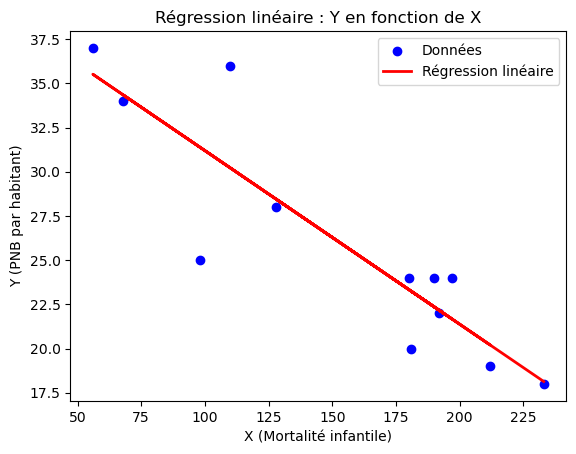

In [ ]:
# On trace les points expérimentaux du data frame
plt.scatter(X, Y, color="blue", label="Données")

# On trace la droite de régression
Y_pred = a * X + b
plt.plot(X, Y_pred, color="red", linewidth=2, label="Régression linéaire")

# Titres et légendes
plt.title("Régression linéaire : Y en fonction de X")
plt.xlabel("X (Mortalité infantile)")
plt.ylabel("Y (PNB par habitant)") 
plt.legend()

# Sauvegarde
plt.savefig("regression.png", dpi=300)
plt.show()

---
## <a name="ex3">Exercise 3: Discrete isotropic total variation</a>

This exercise is devoted to the computation of the discrete isotropic total variation (TV) of an input matrix $\mathbf{X} = [\mathbf{x}_n]_{1 \leq n \leq N} \in\mathbb{C}^{M \times N}$, which is particularly useful in Bayesian inference (e.g., for inverse problems) to promote piece-wise smooth solutions. The TV is defined as

\begin{equation*}
    \text{TV}(\mathbf{X}) = \Vert D(\mathbf{X}) \Vert_{1,2} = \sum_{m=1}^M \sum_{n=1}^N \sqrt{[\mathbf{XD}_h]^2_{m,n} + [\mathbf{D}_v\mathbf{X}]^2_{m,n}},
\end{equation*}

where $[\mathbf{Z}]_{m,n}$ denotes the elements in position $(m,n)$ of the matrix $\mathbf{Z}$,

\begin{align*}
    D(X) &= (\mathbf{XD}_h, \mathbf{D}_v\mathbf{X}) \in \mathbb{C}^{M\times N} \times \mathbb{C}^{M\times N} \\
    %
    \mathbf{XD}_h &= [\mathbf{x}_2-\mathbf{x}_1, \dotsc, \mathbf{x}_N-\mathbf{x}_{N-1}, \mathbf{0}_M] \in \mathbb{C}^{M\times N} \\
    %
    \mathbf{D}_v\mathbf{X} &= [\tilde{\mathbf{x}}_2^T-\tilde{\mathbf{x}}^T_1, \dotsc, \tilde{\mathbf{x}}^T_M-\tilde{\mathbf{x}}^T_{M-1}, \mathbf{0}_N]^T \in \mathbb{C}^{M\times N},
\end{align*}

$\mathbf{x}_n \in \mathbb{C}^{M}$ is the $n$-th column of $\mathbf{X}$, and $\tilde{\mathbf{x}}_m \in \mathbb{C}^{1\times N}$ is the $m$-th row of $\mathbf{X}$. 
The linear operator $D: \mathbb{C}^{M\times N} \rightarrow \mathbb{C}^{M\times N} \times \mathbb{C}^{M\times N} $ is the discrete gradient operator. The adjoint of $D$, $D^*: \mathbb{C}^{M\times N} \times \mathbb{C}^{M\times N} \rightarrow \mathbb{C}^{M\times N}$, is given by

\begin{align*}
    (\forall \mathbf{Y} = (\mathbf{Y}_h,\mathbf{Y}_v)), \quad D^*(\mathbf{Y}) &= \mathbf{Y}_h\mathbf{D}^*_h + \mathbf{D}^*_v\mathbf{Y}_v \\
    %
    \mathbf{Y}_h\mathbf{D}^*_h &= \big[-\mathbf{y}_{h,1},- [\mathbf{y}_{h,n}-\mathbf{y}_{h,n-1}]_{2 \leq n \leq N-1}, \mathbf{y}_{h, N-1} \big] \\
    %
    \mathbf{D}^*_v\mathbf{Y}_v &= \big[-\tilde{\mathbf{y}}_{v,1}^T,- [\tilde{\mathbf{y}}_{v,m}^T-\tilde{\mathbf{y}}^T_{v,m-1}]_{2 \leq m \leq M-1}, \tilde{\mathbf{y}}^T_{v, M-1} \big]^T
\end{align*}

where $\mathbf{y}_{h,n}$ is the $n$-th column of $\mathbf{Y}_h$, and $\tilde{\mathbf{x}}_{v,m}$ is the $m$-th row of $\mathbf{Y}_v$.

1\. Using `numpy`, implement a function `gradient2D` to compute the 2D discrete gradient operator $D$ applied to a matrix $\mathbf{X}\in\mathbb{C}^{M \times N}$ (no for loops!). Trigger an error message whenever the input array has more than 2 dimensions. If not clear from the implementation, add a few short comments to explain your code.

> Hint: 
> - to trigger an error, you can for instance use an `assert` statement, or raise an [exception (e.g., `AssertionError`)](https://docs.python.org/3/library/exceptions.html);
> - only a few operations are needed: computing vertical differences, horizontal differences, and possibly a concatenation of matrices into a single tensor (= n-dimensional array);
> - possibly useful functions: `np.diff`, `np.c_`, `np.r_` (or `np.concatenate`). 

**Answer**:

In [123]:
import numpy as np

def gradient2D(X):
    
    """
    Calcule le gradient discret d'une matrice 2D.
    Retourne (Dh, Dv) où:
      - Dh est la matrice des différences horizontales
      - Dv est la matrice des différences verticales
    """
  
    # On vérifie que X est bien 2D
    assert X.ndim == 2, "L'entrée doit être une matrice 2D"

    # Différences horizontales (colonnes) : x_{n+1} - x_n
    Dh = np.diff(X, axis=1)
    # On n'oublie pas d'ajouter la colonne de 0 à la fin
    Dh = np.concatenate([Dh, np.zeros((X.shape[0], 1))], axis=1)

    # Différences verticales (lignes) : x_{m+1} - x_m
    Dv = np.diff(X, axis=0)
    # On n'oublie pas d'ajouter la ligne de 0 à la fin
    Dv = np.concatenate([Dv, np.zeros((1, X.shape[1]))], axis=0)

    return Dh, Dv


2\. Implement a unit-test to validate the behaviour of the `gradient2D` function. For instance, you can check the format of the output, and test the result when the function is evaluated on a constant matrix (for both a square and a non-square input matrix). Run the unit-test from the present Jupyter notebook.

**Answer**:

In [126]:
def test_gradient2D(X):
    """
    Test simple de la fonction gradient2D :
    - vérifie que les dimensions de X, Dh et Dv sont les mêmes
    - affiche Dh et Dv
    - si X est constante, vérifie que le gradient est nul
    """
    Dh, Dv = gradient2D(X)
    
    # Vérification des tailles
    print("Test sur matrice de taille", X.shape)
    print("Dimensions Dh:", Dh.shape, "| Dimensions Dv:", Dv.shape)
    if Dh.shape != X.shape and Dv.shape != X.shape:
        print("Erreur : Dh et DV n'a pas la même forme que X.")
    elif Dh.shape != X.shape:
        print("Erreur : Dh n'a pas la même forme que X.")
    elif Dv.shape != X.shape:
        print(" Erreur : Dv n'a pas la même forme que X.")
    else:
        print("Les dimensions de Dh et Dv correspondent bien à celles de X.")
    
    print("Dh =\n", Dh)
    print("Dv =\n", Dv)

    if np.allclose(X, X[0,0]):
        if np.allclose(Dh, 0) and np.allclose(Dv, 0):
            print("Le gradient est nul car la matrice est constante.")
        else:
            print("Erreur : le gradient est non nul alors que la matrice constante.")
    else:
        print("La matrice n'est pas constante : pas de test de nullité du gradient.")
        
    print("-"*40)
    return
    


In [127]:
# On test différents cas
# Cas 1 : matrice constante 3x3
test_gradient2D(np.ones((3,3)))

# Cas 2 : matrice constante 2x4
test_gradient2D(np.full((2,4), 7))

# Cas 3 : matrice non constante
test_gradient2D(np.array([[1, 2, 4],
                          [3, 5, 7]]))

Test sur matrice de taille (3, 3)
Dimensions Dh: (3, 3) | Dimensions Dv: (3, 3)
Les dimensions de Dh et Dv correspondent bien à celles de X.
Dh =
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Dv =
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Le gradient est nul car la matrice est constante.
----------------------------------------
Test sur matrice de taille (2, 4)
Dimensions Dh: (2, 4) | Dimensions Dv: (2, 4)
Les dimensions de Dh et Dv correspondent bien à celles de X.
Dh =
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Dv =
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Le gradient est nul car la matrice est constante.
----------------------------------------
Test sur matrice de taille (2, 3)
Dimensions Dh: (2, 3) | Dimensions Dv: (2, 3)
Les dimensions de Dh et Dv correspondent bien à celles de X.
Dh =
 [[1. 2. 0.]
 [2. 2. 0.]]
Dv =
 [[2. 3. 3.]
 [0. 0. 0.]]
La matrice n'est pas constante : pas de test de nullité du gradient.
----------------------------------------


3\. Document the function `gradient2D` with an appropriate docstring (see Lab 1).

**Answer**:

In [141]:
def gradient2D(X):
    # On fait la documentation complète de la fonction en anglais
    """
    Compute the discrete 2D gradient of a matrix X.

    This function calculates the horizontal and vertical finite differences
    of the input 2D array. The result has the same shape as the input, with
    zeros padded on the last column (for horizontal differences) and the
    last row (for vertical differences) to preserve dimensions.

    Parameters
    ----------
    X : ndarray of shape (M, N)
        Input 2D array (real or complex values).
        Must be two-dimensional.

    Returns
    -------
    Dh : ndarray of shape (M, N)
        Horizontal differences: difference between consecutive columns.
    Dv : ndarray of shape (M, N)
        Vertical differences: difference between consecutive rows.

    Raises
    ------
    AssertionError
        If the input array has more than 2 dimensions.

    Examples
    --------
    >>> import numpy as np
    >>> X = np.array([[1, 2, 4],
    ...               [3, 5, 7]])
    >>> Dh, Dv = gradient2D(X)
    >>> Dh
    array([[ 1.,  2.,  0.],
           [ 2.,  2.,  0.]])
    >>> Dv
    array([[ 2.,  3.,  3.],
           [ 0.,  0.,  0.]])
    """
    assert X.ndim == 2, "Input must be a 2D array"

    Dh = np.diff(X, axis=1)
    Dh = np.concatenate([Dh, np.zeros((X.shape[0], 1))], axis=1)

    Dv = np.diff(X, axis=0)
    Dv = np.concatenate([Dv, np.zeros((1, X.shape[1]))], axis=0)

    return Dh, Dv


In [142]:
# On vérifie la documentation
?gradient2D

Signature: gradient2D(X)
Docstring:
Compute the discrete 2D gradient of a matrix X.

This function calculates the horizontal and vertical finite differences
of the input 2D array. The result has the same shape as the input, with
zeros padded on the last column (for horizontal differences) and the
last row (for vertical differences) to preserve dimensions.

Parameters
----------
X : ndarray of shape (M, N)
    Input 2D array (real or complex values).
    Must be two-dimensional.

Returns
-------
Dh : ndarray of shape (M, N)
    Horizontal differences: difference between consecutive columns.
Dv : ndarray of shape (M, N)
    Vertical differences: difference between consecutive rows.

Raises
------
AssertionError
    If the input array has more than 2 dimensions.

Examples
--------
>>> import numpy as np
>>> X = np.array([[1, 2, 4],
...               [3, 5, 7]])
>>> Dh, Dv = gradient2D(X)
>>> Dh
array([[ 1.,  2.,  0.],
       [ 2.,  2.,  0.]])
>>> Dv
array([[ 2.,  3.,  3.],
       [ 0.,  0

4\. Using 1., define a function `tv` to compute $\text{TV}(\mathbf{X})$, $\mathbf{X}\in\mathbb{C}^{M \times N}$. Write a unit-test and document your function.

**Answer**:

In [143]:
def tv(X):
    """
    Compute the discrete isotropic total variation (TV) of a 2D array.

    The isotropic TV is defined as:
        TV(X) = sum_{m,n} sqrt( |Dh[m,n]|^2 + |Dv[m,n]|^2 )
    where Dh and Dv are the horizontal and vertical discrete gradients.

    Parameters
    ----------
    X : ndarray of shape (M, N)
        Input 2D array (real or complex values).
        Must be two-dimensional.

    Returns
    -------
    tv_value : float
        The total variation of X.

    Raises
    ------
    AssertionError
        If the input is not a 2D array.

    Examples
    --------
    >>> X = np.array([[1, 2, 4],
    ...               [3, 5, 7]])
    >>> tv(X)
    12.84161925296378
    """
    assert X.ndim == 2, "Input must be a 2D array"

    Dh, Dv = gradient2D(X)
    tv_value = np.sum(np.sqrt(np.abs(Dh)**2 + np.abs(Dv)**2))

    return tv_value

In [132]:
# Matrice de la documentation
X = np.array([[1, 2, 4], 
              [3, 5, 7]])
tv(X)

12.84161925296378

In [133]:
# Matrice constante -> TV doit être 0
X1 = np.ones((3,3))
print("TV(X1) =", tv(X1))  # attendu : 0

# Matrice simple
X2 = np.array([[1, 2],
               [3, 4]])
print("TV(X2) =", tv(X2))

TV(X1) = 0.0
TV(X2) = 5.23606797749979


5\. Implement a function `gradient2D_adjoint` to compute $D^*(\mathbf{Y})$, the adjoint of the 2D discrete gradient operator $D$ applied to $\mathbf{Y}\in\mathbb{C}^{M \times N}\times \mathbb{C}^{M \times N}$. Add a few short comments to explain your code whenever appropriate.

**Answer**:

In [149]:
def gradient2D_adjoint(Yh, Yv):
    """
    Compute the adjoint of the 2D discrete gradient operator D* applied to (Yh, Yv).

    Parameters
    ----------
    Yh : ndarray of shape (M, N)
        Horizontal component of Y.
    Yv : ndarray of shape (M, N)
        Vertical component of Y.

    Returns
    -------
    Z : ndarray of shape (M, N)
        Result of D*(Y) = Yh * Dh* + Yv * Dv*

    Notes
    -----
    - Dh* applies backward differences along the horizontal direction.
    - Dv* applies backward differences along the vertical direction.
    - Boundaries are handled by adding the appropriate last column/row.

    Example
    -------
    >>> Yh = np.array([[1, 2, 0],
    ...                [3, 4, 0]])
    >>> Yv = np.array([[5, 6, 7],
    ...                [0, 0, 0]])
    >>> gradient2D_adjoint(Yh, Yv)
    array([[-6., -7., -5.],
       [ 2.,  5., 11.]])
    """
    M, N = Yh.shape

    # --- Adjoint horizontal Dh* ---
    # Backward differences parmi les colonnes
    Dh_adj = np.zeros((M, N))
    Dh_adj[:, 0] = -Yh[:, 0]         # first column
    Dh_adj[:, 1:] = Yh[:, :-1] - Yh[:, 1:]

    # --- Adjoint vertical Dv* ---
    # Backward differences parmi les lignes
    Dv_adj = np.zeros((M, N))
    Dv_adj[0, :] = -Yv[0, :]         # first row
    Dv_adj[1:, :] = Yv[:-1, :] - Yv[1:, :]

    # Combiner les contributions
    return Dh_adj + Dv_adj


In [150]:
# Exemple pour la documentation
Yh = np.array([[1, 2, 0],[3, 4, 0]])
Yv = np.array([[5, 6, 7],[0, 0, 0]])
gradient2D_adjoint(Yh, Yv)

array([[-6., -7., -5.],
       [ 2.,  5., 11.]])

6\. Implement a unit-test to validate `gradient2D_adjoint`, e.g., by checking the size of the output from the function and verifying that `gradient2D_adjoint` is adjoint to `gradient2D`, i.e., for any $\mathbf{X}\in\mathbb{C}^{M \times N}$ and $\mathbf{Y}\in\mathbb{C}^{M \times N}\times \mathbb{C}^{M \times N}$:

\begin{equation}
    \forall \mathbf{X} \in \mathbb{C}^{M \times N}, \mathbf{Y} = (\mathbf{Y}_h, \mathbf{Y}_v) \in \mathbb{C}^{M \times N} \times \mathbb{C}^{M \times N}, \;
    %
    \langle D(\mathbf{X}), \mathbf{Y} \rangle_{\mathbb{C}^{M \times N} \times \mathbb{C}^{M \times N}} = \langle \mathbf{X}, D^*(\mathbf{Y}) \rangle_{\mathbb{C}^{M \times N}}, 
\end{equation}

where 

\begin{align}
    &\forall \mathbf{U}, \mathbf{V} \in \mathbb{C}^{M \times N}, \; \langle \mathbf{U}, \mathbf{V} \rangle_{\mathbb{C}^{M \times N}} = \text{Tr}(\mathbf{U}^T \mathbf{V}) = \sum_{m=1}^M \sum_{n=1}^N u_{m,n}^* v_{m,n}, \\
    &\forall \mathbf{U} = (\mathbf{U}_h, \mathbf{U}_v), \mathbf{V} = (\mathbf{V}_h, \mathbf{V}_v) \in \mathbb{C}^{M \times N} \times \mathbb{C}^{M \times N}, \; \langle \mathbf{U}, \mathbf{V} \rangle_{\mathbb{C}^{M \times N} \times \mathbb{C}^{M \times N}} = \langle \mathbf{U}_h, \mathbf{V}_h \rangle_{\mathbb{C}^{M \times N}} + \langle \mathbf{U}_v, \mathbf{V}_v \rangle_{\mathbb{C}^{M \times N}}.
\end{align}

> Hint: to verify `gradient2D_adjoint` is the adjoint of `gradient2D`, evaluate the scalar products above for randomly drawn matrices. Set the random generator to a known state for reproducibility (see [Exercise 1](#ex1)).

> `np.conj` is useful.

**Answer**:

In [144]:
def test_adjoint_property():
    """
    Vérifie que gradient2D_adjoint est bien l'adjoint de gradient2D.
    Test basé sur la relation :
        <D(X), Y> = <X, D*(Y)>
    avec un produit scalaire de Frobenius.
    """

    np.random.seed(123)

    # Matrice X aléatoire
    X = np.random.randn(4, 5) + 1j * np.random.randn(4, 5)

    # Matrices Yh et Yv aléatoires (même taille que X)
    Yh = np.random.randn(4, 5) + 1j * np.random.randn(4, 5)
    Yv = np.random.randn(4, 5) + 1j * np.random.randn(4, 5)

    # Calcul des deux côtés
    Dh, Dv = gradient2D(X)
    lhs = np.vdot(Dh, Yh) + np.vdot(Dv, Yv)      # <D(X), Y>
    rhs = np.vdot(X, gradient2D_adjoint(Yh, Yv)) # <X, D*(Y)>

    print("⟨D(X), Y⟩ =", lhs)
    print("⟨X, D*(Y)⟩ =", rhs)
    print("Différence absolue =", np.abs(lhs - rhs))

    # Vérification (tolérance numérique)
    assert np.allclose(lhs, rhs), "Propriété d'adjoint non respectée"

    print("Test réussi : gradient2D_adjoint est bien l'adjoint de gradient2D.")


In [136]:
# Petit test utilitaire

X = np.array([[1., 2.],
              [3., 4.]])

Yh = np.array([[1., 0.],
               [0., 0.]])  # juste une composante horizontale
Yv = np.zeros_like(X)       # aucune composante verticale

# Calcul des deux côtés
Dh, Dv = gradient2D(X)
lhs = np.vdot(Dh, Yh) + np.vdot(Dv, Yv)      # <D(X), Y>
rhs = np.vdot(X, gradient2D_adjoint(Yh, Yv)) # <X, D*(Y)>

print("⟨D(X), Y⟩ =", lhs)
print("⟨X, D*(Y)⟩ =", rhs)
print("Différence =", np.abs(lhs - rhs))

⟨D(X), Y⟩ = 1.0
⟨X, D*(Y)⟩ = 1.0
Différence = 0.0


In [137]:
X = np.array([[1., 2.],
              [3., 4.]])

Yh = np.zeros_like(X)
Yv = np.array([[0., 1.],
               [0., 0.]])  # juste une composante verticale

Dh, Dv = gradient2D(X)
lhs = np.vdot(Dh, Yh) + np.vdot(Dv, Yv)
rhs = np.vdot(X, gradient2D_adjoint(Yh, Yv))

print("⟨D(X), Y⟩ =", lhs)
print("⟨X, D*(Y)⟩ =", rhs)
print("Différence =", np.abs(lhs - rhs))

⟨D(X), Y⟩ = 2.0
⟨X, D*(Y)⟩ = 2.0
Différence = 0.0


[Bonus, **optional**]. Generalize the `gradient2D` to any number of dimensions ($\mathbf{X} \in \mathbb{C}^{N_1 \times N_2 \times \dotsc \times N_p}$), i.e., by returning tensors obtained by computing differences along each of its dimensions.
> Hint: 
> - you may use a loops here, and/or list comprehension. Using slice objects (see [np.s_](https://numpy.org/doc/stable/reference/generated/numpy.s_.html?highlight=s_#numpy.s_) and [this page](https://stackoverflow.com/questions/24432209/python-index-an-array-using-the-colon-operator-in-an-arbitrary-dimension)) can be an interesting option.
>
> - the definition of the scalar product above can be extended to the case of tensors as follows:
\begin{equation}
    \mathbf{U}, \mathbf{V} \in \mathbb{C}^{N_1 \times N_2 \times \dotsc \times N_p}, \; \langle \mathbf{U}, \mathbf{V} \rangle_{\mathbb{C}^{N_1 \times N_2 \times \dotsc \times N_p}} =  \sum_{n_1 = 1}^{N_1}  \sum_{n_2 = 1}^{N_2} \dotsc \sum_{n_p = 1}^{N_p} u_{n_1, n_2, \dotsc, n_p}^* v_{n_1, n_2, \dotsc, n_p}   
\end{equation}

**Answer**:

In [138]:
import numpy as np

def gradientND(X):
    """
    Generalized discrete gradient operator for an N-dimensional array.

    Computes forward finite differences along each axis, with zero-padding
    at the boundary to preserve the same shape.

    Parameters
    ----------
    X : ndarray of shape (N1, N2, ..., Np)
        Input array of arbitrary dimension.

    Returns
    -------
    grads : list of ndarrays
        List where grads[k] contains the discrete gradient along axis k,
        each with the same shape as X.

    Examples
    --------
    >>> X = np.array([[1, 2, 4],
    ...               [3, 5, 7]])
    >>> grads = gradientND(X)
    >>> len(grads)
    2
    >>> grads[0].shape, grads[1].shape
    ((2, 3), (2, 3))
    """
    grads = []
    for axis in range(X.ndim):
        # differences le long de l’axe
        diff = np.diff(X, axis=axis)
        # padding pour conserver la même taille
        pad_shape = list(X.shape)
        pad_shape[axis] = 1
        padding = np.zeros(pad_shape, dtype=X.dtype)
        grad_axis = np.concatenate([diff, padding], axis=axis)
        grads.append(grad_axis)
    return grads


In [151]:
X = np.array([[1, 2, 4],
              [3, 5, 7]])

grads = gradientND(X)

print("Gradient axe 0 (vertical):\n", grads[0])
print("Gradient axe 1 (horizontal):\n", grads[1])

Gradient axe 0 (vertical):
 [[2 3 3]
 [0 0 0]]
Gradient axe 1 (horizontal):
 [[1 2 0]
 [2 2 0]]


In [140]:
X = np.random.rand(3,3,3)
grads = gradientND(X)
print("Nombre de gradients =", len(grads))  # ici 3, un par axe

Nombre de gradients = 3


## Reference

```bibtex
@article{condat:hal-01309685,
  TITLE = {{Discrete Total Variation: New Definition and Minimization}},
  AUTHOR = {Condat, Laurent},
  URL = {https://hal.archives-ouvertes.fr/hal-01309685},
  JOURNAL = {{SIAM Journal on Imaging Sciences}},
  PUBLISHER = {{Society for Industrial and Applied Mathematics}},
  VOLUME = {10},
  NUMBER = {3},
  PAGES = {1258--1290},
  YEAR = {2017},
  MONTH = Aug,
  DOI = {10.1137/16M1075247},
  KEYWORDS = { variational image processing ; total variation ;  finite-difference schemes ;  coarea formula},
  PDF = {https://hal.archives-ouvertes.fr/hal-01309685v3/file/Condat-newTV.pdf},
  HAL_ID = {hal-01309685},
  HAL_VERSION = {v3},
}
```
